In [26]:
pip install geopandas

In [27]:
import pandas as pd
import geopandas as gpd

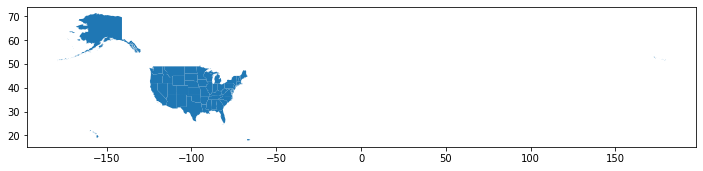

In [28]:
states = gpd.read_file("states.json")
states.plot(figsize=(12,10))

In [29]:
pop = pd.read_csv("Census_Population.csv")

#Filter out mean household income values for each state
household_incomes = pop.loc[89].filter(like="Total!!Estimate") 

# Converts to datafframe
household_incomes = household_incomes.to_frame().reset_index() 
household_incomes.columns = ["NAME", "Mean_Income"] 

#Remove the extra text in state column
household_incomes = household_incomes.replace("!!Total!!Estimate", "", regex=True)  

#Remove NaN values
household_incomes = household_incomes.dropna()  

#Merge mean household income column with geojson
states_data = states.merge(household_incomes)  
states_data

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,Mean_Income
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...","73,434"
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...","92,667"
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...","84,036"
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...","70,743"
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...","113,687"
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...","100,617"
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935...","116,557"
7,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ...","89,598"
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800...","140,207"
9,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ...","82,631"


In [32]:
#Export to file
states_data.to_file("states-data.json", driver="GeoJSON")